In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
dataset = pd.read_csv('../input/Mall_Customers.csv')
#getting information of dataset
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Getting last 10 dataset
dataset.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
# information about total count and averages
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# different properties of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# information about gender
dataset.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

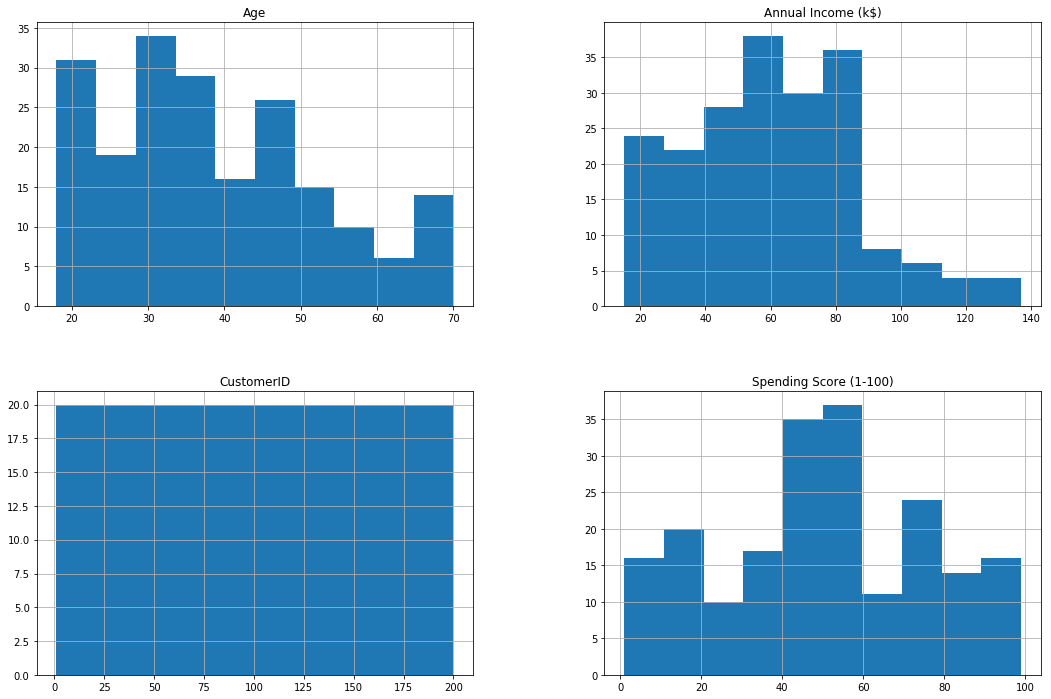

In [7]:
dataset.hist(figsize = (18,12))
plt.show()

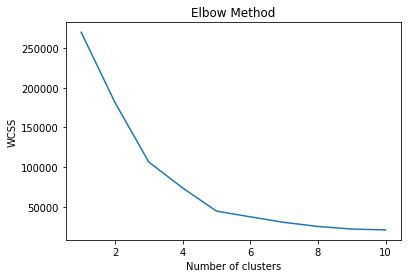

In [8]:
# Algorithm for clustring 
# Will be using K-Means to get better understanding
# x is independent variable having columns Age and Annual Income
x = dataset.iloc[:,[3,4]].values 

''' We will be required a centroids i.e this will allow us to group our data to perticular centroid for that we will use 
Elbow method of K-Means'''
# WCSS => within-cluster-sum-of-square
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

** From above graph we clearly see that the best wcss value is somewhere near 3000 mark having about 5 cluster. So, we will select 5 as cluster value. **

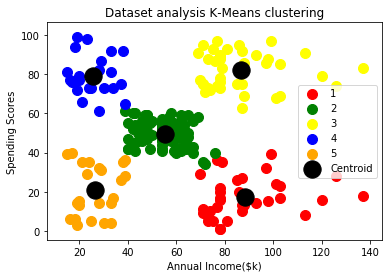

In [9]:
kmeans = kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_means = kmeans.fit_predict(x)

# visualising the cluster
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'blue', label = '4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = '5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] , s = 300, c = 'black', label = 'Centroid')
plt.title("Dataset analysis K-Means clustering")
plt.xlabel('Annual Income($k)')
plt.ylabel('Spending Scores')
plt.legend()
plt.show()

** From above graph we see that the cluser number 3 is actually the target area for the bussiness planers as cluster number 3 peoples have modarate Annual income but have more Spending Scores. So, bussiness planers will targat this people, as they most likely to buy any product or services provided by the mall. **